In [505]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [506]:
plt.rc('font', family = 'gulim') 

### 데이터 불러오기 및 확인

In [507]:
product = pd.read_excel('./물품_정보_세부_카테고리_분류.xlsx')

In [508]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   항목       483 non-null    object 
 1   가로(mm)   483 non-null    float64
 2   세로(mm)   483 non-null    float64
 3   높이(mm)   483 non-null    float64
 4   중량(g)    483 non-null    float64
 5   취급주의     483 non-null    int64  
 6   세부_카테고리  483 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 26.5+ KB


In [509]:
product.describe()

,가로(mm),세로(mm),높이(mm),중량(g),취급주의
count,483.000000,483.000000,483.000000,483.000000,483.000000
mean,214.728720,154.354331,117.963530,856.653408,0.136646
std,129.780103,95.951584,92.837365,1547.524198,0.343829
min,2.200000,2.794000,0.200000,0.300000,0.000000
25%,115.697000,80.500000,48.761000,140.300000,0.000000
50%,191.008000,135.100000,94.000000,330.000000,0.000000
75%,304.800000,209.600000,168.947000,834.550000,0.000000
max,1270.000000,789.940000,490.000000,16782.000000,1.000000


In [510]:
# 카테고리별 갯수 확인
category_groups = product.groupby('세부_카테고리').size()
print(category_groups)

세부_카테고리
가공식품          34
건강기능식품         5
그 밖의 화장품류     41
세정용 화장품류      15
세제류           11
음료             5
의류             7
의약외품류         20
잡화류          251
전자제품류         84
제과류           10
dtype: int64


In [511]:
# 가로길이별 갯수 확인
width_groups = product.groupby('가로(mm)').size().sort_values(ascending=False).head(30)
print(width_groups)

가로(mm)
127.0    13
300.0     7
160.0     7
165.1     4
216.0     4
254.0     4
406.4     4
381.0     4
320.0     4
190.0     4
175.0     4
80.0      3
190.5     3
152.4     3
50.0      3
170.0     3
304.8     3
182.0     3
350.0     3
203.0     3
203.2     3
387.1     3
345.0     3
97.0      3
100.0     3
101.6     3
140.0     3
361.0     3
73.0      2
266.7     2
dtype: int64


#### Boxplot으로 이상치 확인

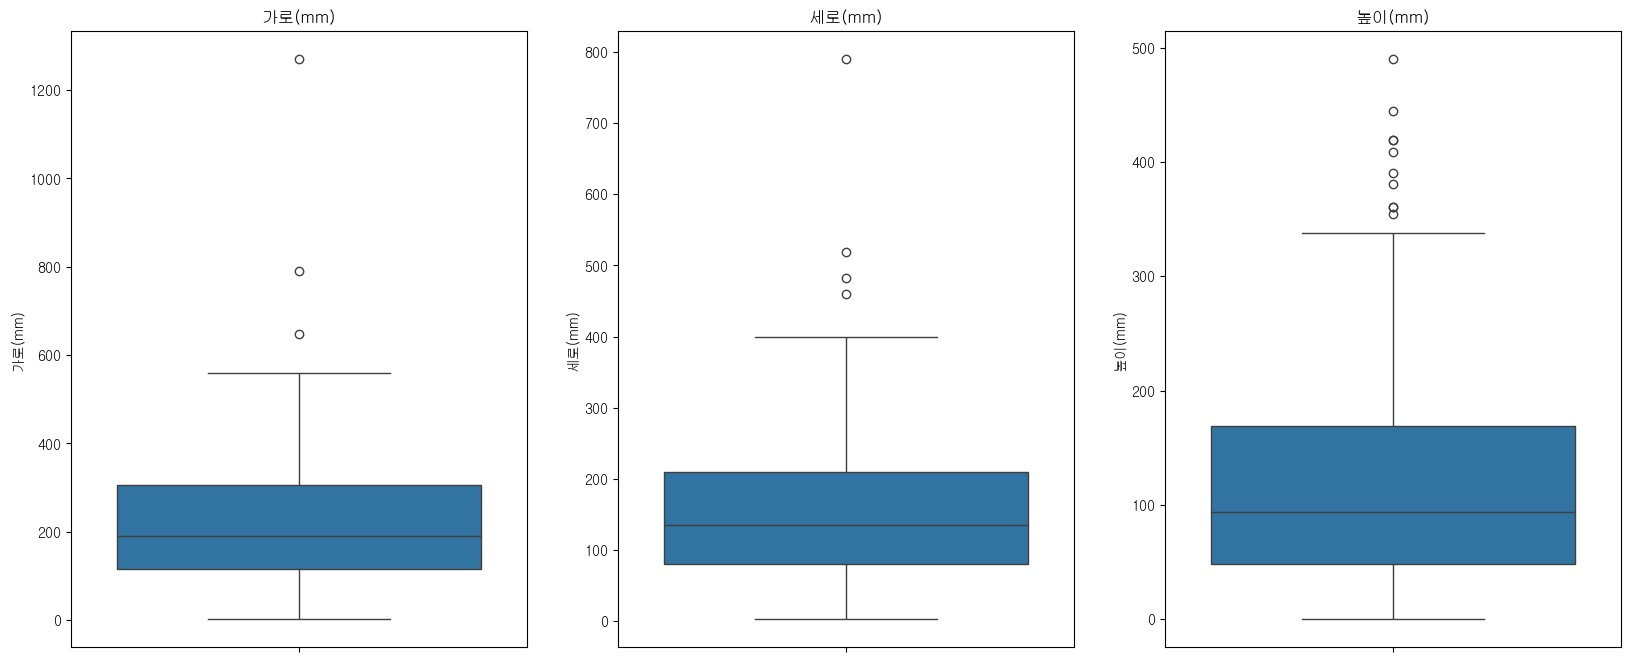

In [512]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(data=product['가로(mm)'], ax=ax1)
ax1.set_title('가로(mm)')

sns.boxplot(data=product['세로(mm)'], ax=ax2)
ax2.set_title('세로(mm)')

sns.boxplot(data=product['높이(mm)'], ax=ax3)
ax3.set_title('높이(mm)')

# sns.boxplot(data=product['중량(g)'], ax=ax4)
# ax4.set_title('중량(g)')

plt.show()

#### 히스토그램과 정규분포 확인

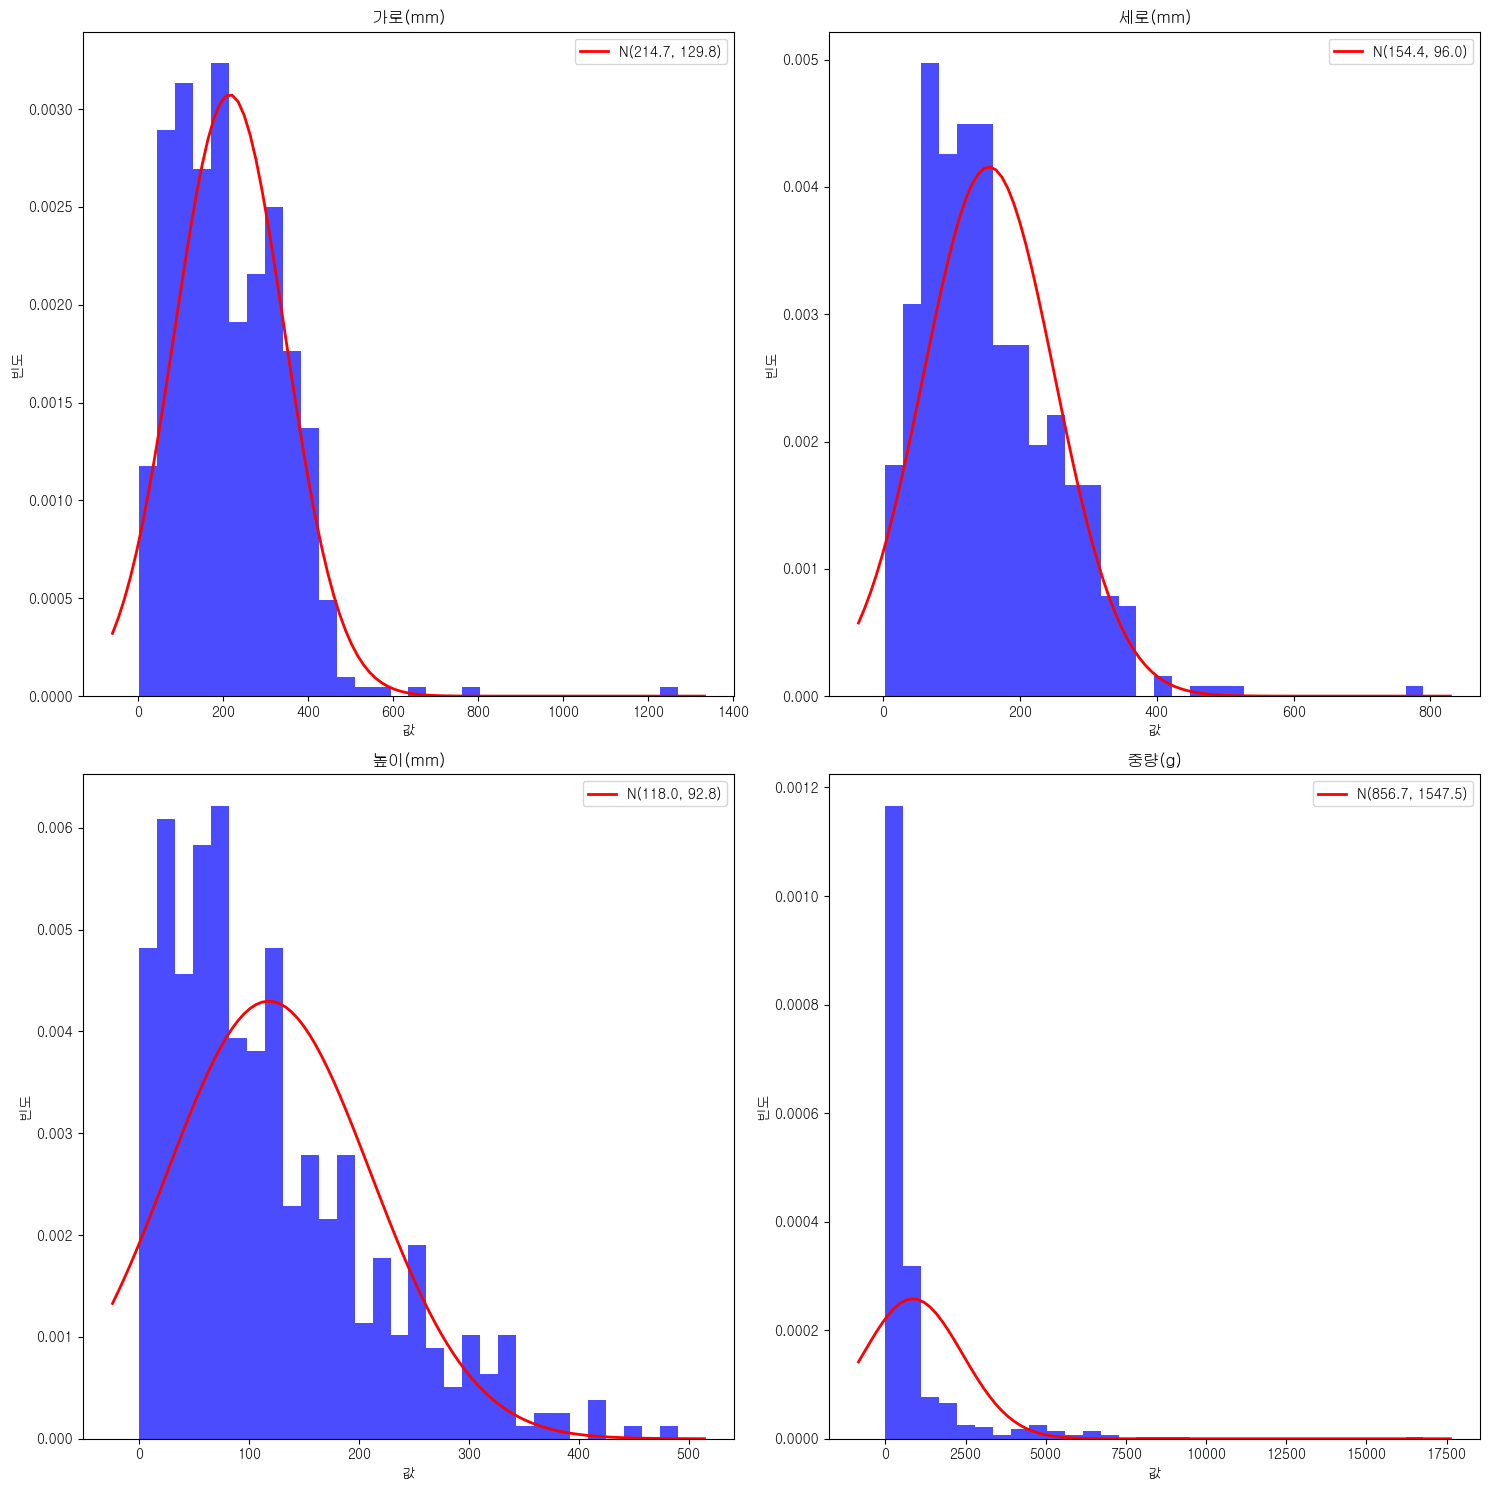

In [513]:
from scipy import stats

plt.figure(figsize=(15, 15))

# 4개의 subplot 생성
features = ['가로(mm)', '세로(mm)', '높이(mm)', '중량(g)']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    
    # 데이터
    data = product[feature]
    
    # 히스토그램 그리기 (density=True로 설정하여 확률 밀도로 변환)
    plt.hist(data, bins=30, density=True, alpha=0.7, color='blue')
    
    # 정규분포 곡선을 위한 x 범위 생성
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    # 정규분포 매개변수 계산
    mu = data.mean()
    sigma = data.std()
    
    # 정규분포 곡선 그리기
    p = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'r-', lw=2, label=f'N({mu:.1f}, {sigma:.1f})')
    
    plt.title(feature)
    plt.xlabel('값')
    plt.ylabel('빈도')
    plt.legend()

plt.tight_layout()
plt.show()

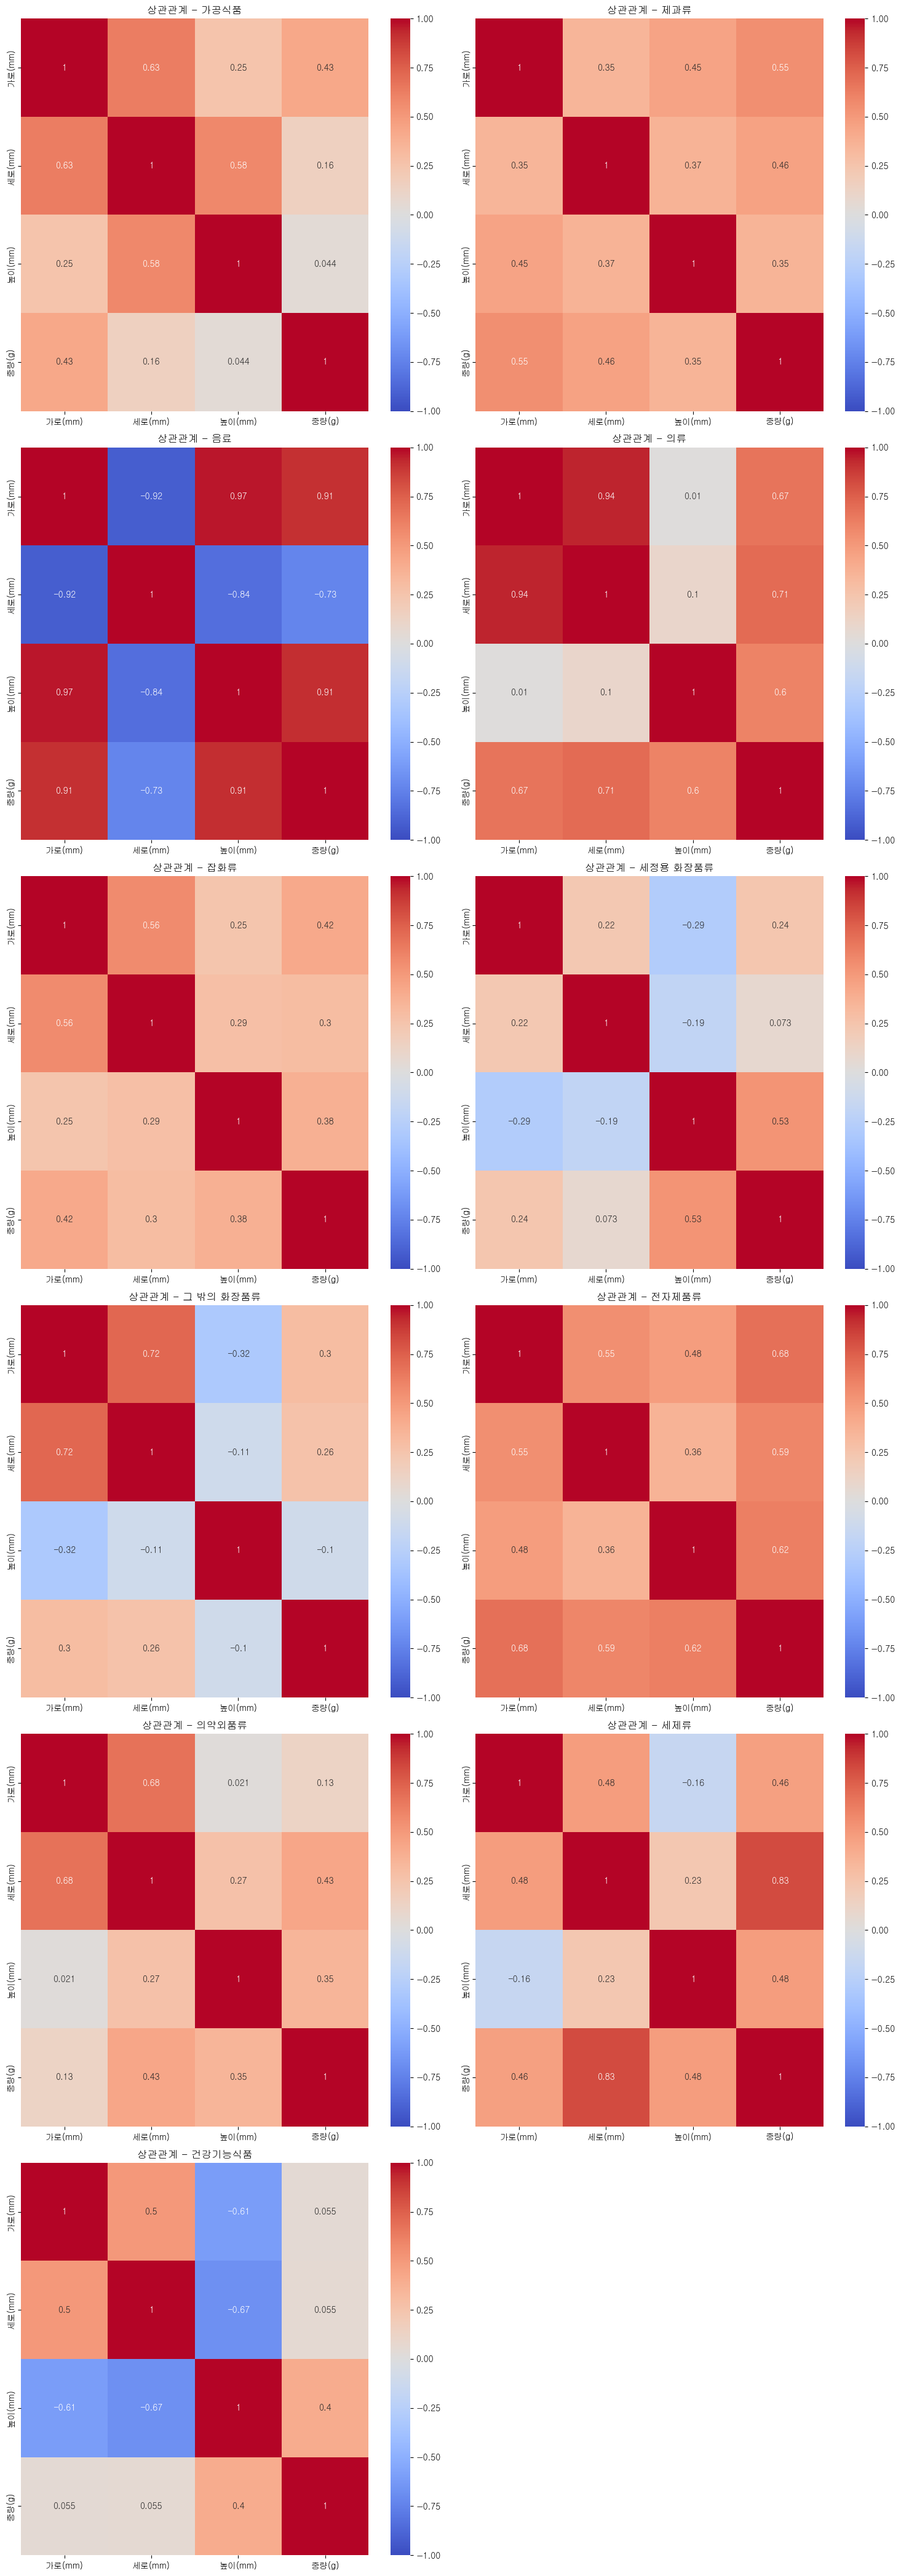

In [514]:
# subplot으로 한 번에 비교
categories = product['세부_카테고리'].unique()
n_categories = len(categories)

# 적절한 subplot 크기 계산
n_cols = 2
n_rows = (n_categories + 1) // 2

plt.figure(figsize=(15, 7*n_rows))

for idx, category in enumerate(categories, 1):
    category_data = product[product['세부_카테고리'] == category]
    correlation = category_data[features].corr()
    
    plt.subplot(n_rows, n_cols, idx)
    sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'상관관계 - {category}')

plt.tight_layout()
plt.show()

#### 최대 박스 규격에서 벗어나는 물품 체크

In [515]:
print((product['가로(mm)'] >= 480).value_counts())
print((product['세로(mm)'] >= 480).value_counts())
print((product['높이(mm)'] >= 480).value_counts())
print(((product['가로(mm)'] >= 480) | (product['세로(mm)'] >= 480) | (product['높이(mm)'] >= 480)).value_counts())

가로(mm)
False    477
True       6
Name: count, dtype: int64
세로(mm)
False    480
True       3
Name: count, dtype: int64
높이(mm)
False    482
True       1
Name: count, dtype: int64
False    474
True       9
Name: count, dtype: int64


In [516]:
stuff = product[product['세부_카테고리'] == '잡화류']
print(stuff.head())

                      항목  가로(mm)  세로(mm)  높이(mm)  중량(g)  취급주의 세부_카테고리
48  Steve Madden 남자 로퍼구두   376.9   229.1   132.1  453.6     0     잡화류
49     Calvin Klein 여자구두   288.0   179.1   103.9  581.0     0     잡화류
50  Alpine Swiss 남성용 목도리   101.6    76.2    12.7  113.4     0     잡화류
51     Myneiyi 패션 실크 스카프    25.0    20.0     1.5  100.0     0     잡화류
52  PrettyGarden 여성용 스웨터   283.0   242.0    54.0  554.0     0     잡화류


In [517]:
print(((stuff['가로(mm)'] >= 480) | (stuff['세로(mm)'] >= 480) | (stuff['높이(mm)'] >= 480)).value_counts())

False    244
True       7
Name: count, dtype: int64


In [518]:
oversize = product[
    (product['가로(mm)'] >= 480) |
    (product['세로(mm)'] >= 480) |
    (product['높이(mm)'] >= 480) |
    (product['중량(g)'] >= 30000)
]

oversize

,항목,가로(mm),세로(mm),높이(mm),중량(g),취급주의,세부_카테고리
146,SKYSPER 하이킹 백팩,170.000,259.000,490.000,500.0,0,잡화류
305,차량용 햇빛가리개,477.520,518.160,127.000,580.5,0,잡화류
312,주차 스토퍼,543.560,200.660,198.120,6699.5,0,잡화류
404,바이올린,789.940,260.096,109.982,2095.5,1,잡화류
405,우쿨렐레,558.800,198.120,76.200,816.4,0,잡화류
407,색소폰,647.700,254.000,152.400,4141.2,0,잡화류
409,첼로,1270.000,482.600,330.200,8010.4,0,잡화류
479,전자드럼,500.126,459.994,130.048,6314.0,0,전자제품류
480,전자키보드,240.030,789.940,70.104,2753.3,0,전자제품류


###### 박스 규격에 벗어나는 물품들을 보면 대체로 악기인 것을 알 수 있다.

In [616]:
exception_product = product[(product['가로(mm)'] + product['세로(mm)'] + product['높이(mm)']) <= 500]
print(exception_product.groupby('세부_카테고리').size())
print("가로, 세로, 높이의 합이 50cm이하인 상품의 개수 : ", exception_product['세부_카테고리'].count())

세부_카테고리
가공식품          20
그 밖의 화장품류     38
세정용 화장품류      15
세제류            7
의류             3
의약외품류          8
잡화류          135
전자제품류         48
제과류            7
dtype: int64
가로, 세로, 높이의 합이 50cm이하인 상품의 개수 :  281


In [618]:
exception_product.head()

,항목,가로(mm),세로(mm),높이(mm),중량(g),취급주의,세부_카테고리
2,하리보 젤리,25.4,25.4,25.4,2.0,0,제과류
5,Sarah's Candy Factory 마시멜로,162.0,158.0,67.0,73.7,0,제과류
6,Life Savers 민트캔디,175.0,166.9,69.1,368.5,0,제과류
7,Ice Breakers Ice Cubes 페퍼민트 츄잉껌,51.3,145.5,186.7,555.1,0,가공식품
8,ChocZero 무설탕 캐러멜,152.9,109.0,23.1,99.2,0,제과류


In [619]:
exception_product_caution = exception_product[exception_product['취급주의'] == 1]

In [620]:
exception_product_caution.groupby('세부_카테고리').size()

세부_카테고리
가공식품          2
그 밖의 화장품류     9
잡화류          11
전자제품류        20
dtype: int64

### 전처리 및 알고리즘 구현

##### 물품은 취급주의인지 아닌지에 따라서 패키징 제한 조건이 달라진다.

In [629]:
# 취급주의 물품 확인
caution_product = product[product['취급주의'] == 1]
caution_product.head()

,항목,가로(mm),세로(mm),높이(mm),중량(g),취급주의,세부_카테고리
11,Jordan's Skinny Syrups 시럽 샘플러,228.6,152.4,304.8,4500.0,1,가공식품
14,Garden of Life 코코넛 오일,77.2,77.2,130.2,396.9,1,가공식품
29,Dole 슬라이스 복숭아,334.0,176.0,160.0,666.2,1,가공식품
35,Atlas 엑스트라 버진 올리브 오일,120.0,60.0,12.7,1600.0,1,가공식품
94,Skin1004 Asiatica 앰플,40.0,40.0,100.0,100.0,1,그 밖의 화장품류


In [630]:
print(caution_product.groupby('세부_카테고리').size())
print(caution_product['세부_카테고리'].count())

세부_카테고리
가공식품          4
그 밖의 화장품류    11
잡화류          18
전자제품류        33
dtype: int64
66


In [524]:
# 비취급주의 물품만 선별
product_filtered = product.drop(caution_product.index)

In [525]:
product_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 482
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   항목       417 non-null    object 
 1   가로(mm)   417 non-null    float64
 2   세로(mm)   417 non-null    float64
 3   높이(mm)   417 non-null    float64
 4   중량(g)    417 non-null    float64
 5   취급주의     417 non-null    int64  
 6   세부_카테고리  417 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 26.1+ KB


##### 물품은 취급주의인지 아닌지에 따라서 패키징이 달라진다.

###### 박스 크기 규격(1호 ~ 6호)

In [526]:
box_size = pd.DataFrame({'box_num' : [1, 2, 3, 4, 5, 6],
                         'width' : [220, 270, 350, 340, 410, 480],
                         'depth' : [190, 180, 250, 250, 310, 380],
                         'height' : [90, 150, 100, 210, 280, 340]
                         })

In [527]:
box_size

,box_num,width,depth,height
0,1,220,190,90
1,2,270,180,150
2,3,350,250,100
3,4,340,250,210
4,5,410,310,280
5,6,480,380,340


In [528]:
# from itertools import permutations

# def box_standardize(product_df, box_size):
#     """
#     product_df : 물품 정보 (가로(mm), 세로(mm), 높이(mm) 등)
#     box_size   : 박스 정보 (box_num, width, depth, height)

#     로직:
#       1) box_num 순서대로(작은 박스부터) 검사
#       2) 각 박스에 대해 (가로, 세로, 높이)의 모든 순열(6가지) 확인
#       3) 물품이 박스에 들어가면 각 길이를(박스-물품) 계산 후 즉시 기록하고 루프 종료
#       4) 모든 박스가 맞지 않으면 '패키징 제외' 처리
    
#     반환값 : product_df에 '패키징' 컬럼을 추가하여, 
#              각 제품이 들어갈 수 있는 박스 번호를 append
#              (만약 모든 박스에 들어가지 않으면 패키징 제외)
#     """
#     # 결과를 저장하기 위해 데이터프레임 복사
#     product_df = product_df.copy()

#     # 가로, 세로, 높이 차이 값을 저장할 컬럼과 포장공간비율 컬럼 만들고 초기화
#     product_df['가로 차이(mm)'] = np.nan
#     product_df['세로 차이(mm)'] = np.nan
#     product_df['높이 차이(mm)'] = np.nan
#     product_df['포장공간비율'] = np.nan # 물품 사이즈 부피 / 박스 부피 * 100

#     assigned_box = []

#     # 모든 행(제품)에 대해 반복
#     for idx, row in product_df.iterrows():
#         # 현재 물품의 가로/세로/높이를 리스트로 추출
#         dims = [row['가로(mm)'], row['세로(mm)'], row['높이(mm)']]

#         # 박스를 찾았는지 여부
#         found_box = None
#         final_perm = None
        
#         # box_df를 작은 박스부터 확인
#         for _, box_row in box_size.iterrows():
#             box_w, box_d, box_h = box_row['width'], box_row['depth'], box_row['height']

#             # (가로, 세로, 높이)의 모든 회전(순열)을 확인
#             for perm in permutations(dims):
#                 if perm[0] < box_w and perm[1] < box_d and perm[2] < box_h:
#                     # 들어갈 수 있는 박스를 찾으면 중단
#                     found_box = box_row['box_num']
#                     final_perm = perm
#                     break
#             # 한 박스라도 맞으면 바깥 루프 중단    
#             if found_box is not None:
#                 break
    
#         if found_box is None:
#             assigned_box.append('패키징 제외')
#         else:
#             assigned_box.append(found_box)
#             # 박스와 물품 사이의 차이 계산 (가로/세로/높이)
#             product_df.at[idx, '가로 차이(mm)'] = box_w - final_perm[0]
#             product_df.at[idx, '세로 차이(mm)'] = box_d - final_perm[1]
#             product_df.at[idx, '높이 차이(mm)'] = box_h - final_perm[2]
#             product_df.at[idx, '포장공간비율'] = (((box_w*box_d*box_h)-(final_perm[0]*final_perm[1]*final_perm[2]))/(box_w*box_d*box_h))*100

#     # 결과 저장
#     product_df['패키징'] = assigned_box

#     return product_df

In [604]:
from itertools import permutations

def box_standardize(product_df, box_size):
    """
    product_df : 물품 정보 (가로(mm), 세로(mm), 높이(mm) 등)
    box_size   : 박스 정보 (box_num, width, depth, height)

    로직:
      1) box_num 순서대로(작은 박스부터) 검사
      2) 각 박스에 대해 물품 사이즈(가로, 세로, 높이)의 모든 순열(6가지) 확인
      3) (박스-물품)의 각 길이 및 남는 공간의 부피 계산
      4) 예외 대상에 해당되면 빈 공간비율과 남는 공간(가로, 세로, 높이)에 대한 제약 조건 제외
      5) 모든 조건에 맞으면 박스 할당
      6) 모든 박스가 맞지 않으면 '패키징 제외' 처리
    """
    # 결과를 저장하기 위해 데이터프레임 복사
    product_df = product_df.copy()

    # 가로, 세로, 높이 차이 값을 저장할 컬럼과 포장공간비율 컬럼 만들고 초기화
    product_df['가로 차이(mm)'] = np.nan
    product_df['세로 차이(mm)'] = np.nan
    product_df['높이 차이(mm)'] = np.nan
    product_df['포장공간비율'] = np.nan # (박스 부피 대비 빈 공간 %)
    product_df['패키징']        = None

    box_size_sorted = box_size.sort_values(by='box_num')

    # 모든 행(제품)에 대해 반복
    for idx, row in product_df.iterrows():
        # 현재 물품의 가로/세로/높이를 추출
        pw, pd, ph = row['가로(mm)'], row['세로(mm)'], row['높이(mm)']

        # 특별 조건 판별
        sum_dim = pw + pd + ph
        sorted_dim = sorted([pw, pd, ph])
        min_len, mid_len, max_len = sorted_dim[0], sorted_dim[1], sorted_dim[2]
        
        cond1 = (sum_dim <= 500)
        cond2 = (min_len <= 0.2 * max_len) and (mid_len <= 0.2 * max_len)
        cond3 = (mid_len >= 4 * min_len)

        is_special = (cond1 or cond2 or cond3)

        # 박스를 찾았는지 여부
        found_box = False
        
        # box_df를 작은 박스부터 확인
        for _, box_row in box_size_sorted.iterrows():
            box_num = box_row['box_num']
            box_w, box_d, box_h = box_row['width'], box_row['depth'], box_row['height']

            # (가로, 세로, 높이)의 모든 순열(6가지)을 확인
            for perm in permutations([pw, pd, ph]):
                w, d, h = perm
                
                # 박스에 들어가는지 검사
                if (w < box_w) and (d < box_d) and (h < box_h):
                    
                    # 남는 공간(가로, 세로, 높이 차이) 계산
                    diff_w = box_w - w
                    diff_d = box_d - d
                    diff_h = box_h - h

                    # leftover 비율 계산
                    # ratio_w = diff_w / box_w
                    # ratio_d = diff_d / box_d
                    # ratio_h = diff_h / box_h

                    # 박스 부피 & 물품 부피
                    # 남는 공간의 부피 계산
                    box_volume = box_w * box_d * box_h
                    product_volume = w * d * h
                    ratio_package = (box_volume - product_volume) / box_volume * 100

                    if is_special:
                        # 특별조건이면 포장공간비율 50% 이하이어도 괜찮음
                        product_df.at[idx, '패키징']        = box_num
                        product_df.at[idx, '가로 차이(mm)'] = diff_w
                        product_df.at[idx, '세로 차이(mm)'] = diff_d
                        product_df.at[idx, '높이 차이(mm)'] = diff_h
                        product_df.at[idx, '포장공간비율']  = ratio_package

                        found_box = True
                        break
                        
                    else:
                        # leftover 비율을 모두 50mm 이상으로 제한, 남는 공간비율 50% 이상으로 제한
                        if ((diff_w >= 50) and (diff_d >= 50) and (diff_h >= 50)) and (ratio_package >= 50):
                            product_df.at[idx, '패키징']        = box_num
                            product_df.at[idx, '가로 차이(mm)'] = diff_w
                            product_df.at[idx, '세로 차이(mm)'] = diff_d
                            product_df.at[idx, '높이 차이(mm)'] = diff_h
                            product_df.at[idx, '포장공간비율']  = ratio_package

                            found_box = True
                            break

            # 박스 할당 완료 시, 다른 박스는 확인 불필요
            if found_box:
                break
    
        # 모든 박스에서도 맞지 않으면 -> '패키징 제외'
        if not found_box:
            product_df.at[idx, '패키징'] = '패키징 제외'

    return product_df

In [605]:
box_standard = box_standardize(product_filtered, box_size)

In [606]:
box_standard

,항목,가로(mm),세로(mm),높이(mm),중량(g),취급주의,세부_카테고리,가로 차이(mm),세로 차이(mm),높이 차이(mm),포장공간비율,패키징
0,콘푸러스트 시리얼,307.300,251.500,381.000,36.3,0,가공식품,99.000,72.70,88.500,52.518790,6
1,SKIPPY 땅콩 잼,225.800,225.800,354.800,751.3,0,가공식품,125.200,154.20,114.200,70.830584,6
2,하리보 젤리,25.400,25.400,25.400,2.0,0,제과류,194.600,164.60,64.600,99.564406,1
3,POPS 막대 사탕,313.900,249.900,79.000,979.8,0,제과류,96.100,60.10,201.000,82.586700,5
4,페로로쉐 초콜릿,310.100,40.100,272.500,524.5,0,제과류,99.900,269.90,7.500,90.478419,5
...,...,...,...,...,...,...,...,...,...,...,...,...
474,샤오미 보조배터리,148.400,73.000,15.000,225.0,0,전자제품류,71.600,117.00,75.000,95.680542,1
479,전자드럼,500.126,459.994,130.048,6314.0,0,전자제품류,NaN,NaN,NaN,NaN,패키징 제외
480,전자키보드,240.030,789.940,70.104,2753.3,0,전자제품류,NaN,NaN,NaN,NaN,패키징 제외
481,플레이스테이션 게임 조명,69.800,304.800,101.600,99.2,0,전자제품류,45.200,148.40,30.200,75.296639,3


In [607]:
box_standard.groupby('패키징').size()

패키징
1         159
2          52
3          28
4          23
5          77
6          54
패키징 제외     24
dtype: int64

In [597]:
no_space_box = box_standard[(box_standard['포장공간비율']) <= 20]
no_space_box

,항목,가로(mm),세로(mm),높이(mm),중량(g),취급주의,세부_카테고리,가로 차이(mm),세로 차이(mm),높이 차이(mm),포장공간비율,패키징
135,Mazzello 스틸 푸쉬업 바,216.0,162.0,89.0,690.0,0,잡화류,4.0,28.0,1.0,17.217225,1


In [598]:
# many_space_box1 = box_standardize[(box_standardize['포장공간비율'] >= 90) & (box_standardize['패키징'] == 1)]
many_space_box1 = box_standard[(box_standard['포장공간비율'] >= 50)]
many_space_box1.count()

항목           385
가로(mm)       385
세로(mm)       385
높이(mm)       385
중량(g)        385
취급주의         385
세부_카테고리      385
가로 차이(mm)    385
세로 차이(mm)    385
높이 차이(mm)    385
포장공간비율       385
패키징          385
dtype: int64

In [599]:
small_product = product[(product['가로(mm)'] + product['세로(mm)'] + product['높이(mm)']) <= 500]
print(small_product.groupby('세부_카테고리').size())
print(small_product.count())

세부_카테고리
가공식품          20
그 밖의 화장품류     38
세정용 화장품류      15
세제류            7
의류             3
의약외품류          8
잡화류          135
전자제품류         48
제과류            7
dtype: int64
항목         281
가로(mm)     281
세로(mm)     281
높이(mm)     281
중량(g)      281
취급주의       281
세부_카테고리    281
dtype: int64


In [632]:
no_box = box_standard[box_standard['패키징'] == '패키징 제외']
no_box

,항목,가로(mm),세로(mm),높이(mm),중량(g),취급주의,세부_카테고리,가로 차이(mm),세로 차이(mm),높이 차이(mm),포장공간비율,패키징
17,Lay's 감자칩,190.500,342.900,444.400,1130.0,0,가공식품,NaN,NaN,NaN,NaN,패키징 제외
84,Casio 디지털 시계,90.000,340.000,390.000,53.9,0,잡화류,NaN,NaN,NaN,NaN,패키징 제외
146,SKYSPER 하이킹 백팩,170.000,259.000,490.000,500.0,0,잡화류,NaN,NaN,NaN,NaN,패키징 제외
220,BabyBjörn 변기 의자,361.000,355.000,315.000,1814.0,0,잡화류,NaN,NaN,NaN,NaN,패키징 제외
228,아기용 자전거 시트,340.000,317.000,305.000,3000.0,0,잡화류,NaN,NaN,NaN,NaN,패키징 제외
231,SEREED 아기 밸런스 자전거,431.000,236.000,191.000,2140.0,0,잡화류,NaN,NaN,NaN,NaN,패키징 제외
295,고압 세척기,355.600,342.900,419.100,9000.0,0,전자제품류,NaN,NaN,NaN,NaN,패키징 제외
304,샘소나이트 차량 허리쿠션,342.900,355.600,114.300,226.7,0,잡화류,NaN,NaN,NaN,NaN,패키징 제외
305,차량용 햇빛가리개,477.520,518.160,127.000,580.5,0,잡화류,NaN,NaN,NaN,NaN,패키징 제외
309,삼각대(비상 경고판),449.072,155.956,131.064,1737.2,0,잡화류,NaN,NaN,NaN,NaN,패키징 제외


In [615]:
no_box.groupby('세부_카테고리').size()

세부_카테고리
가공식품       1
건강기능식품     1
의약외품류      1
잡화류       14
전자제품류      7
dtype: int64